MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Kavya Angara

EID: ka32577

Name:Pratik Gawli

EID:pbg397

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  



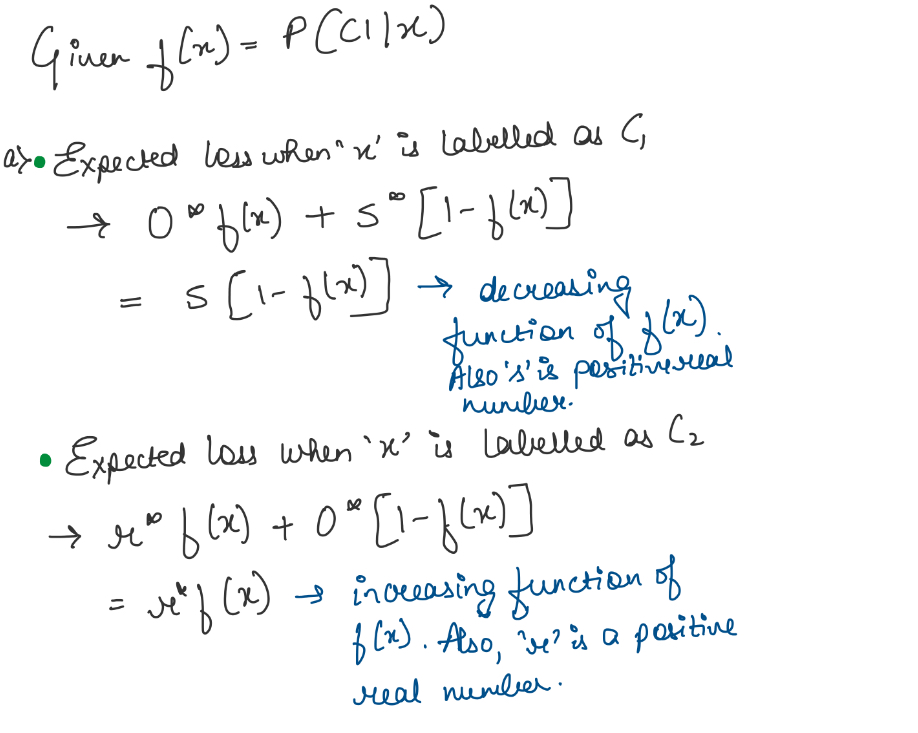

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$


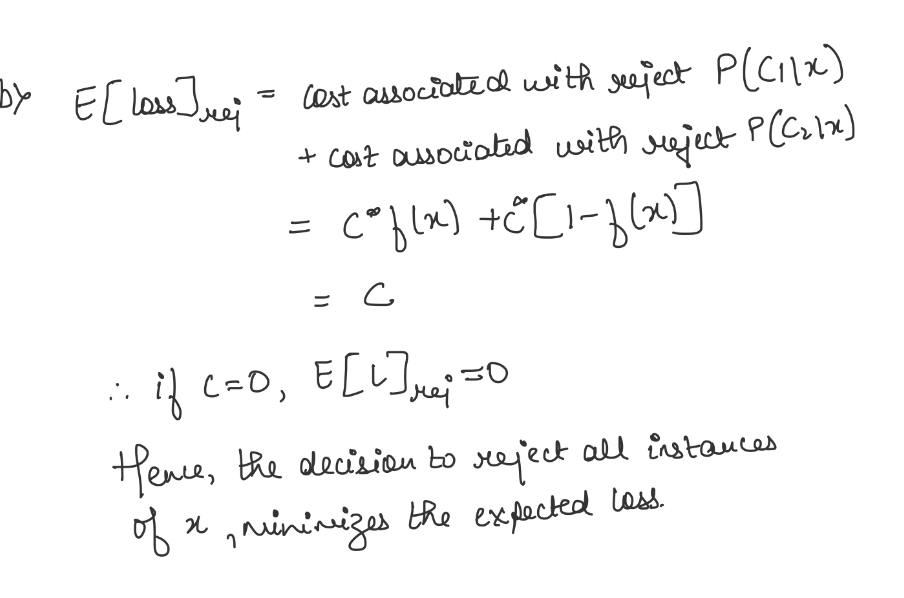


**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?


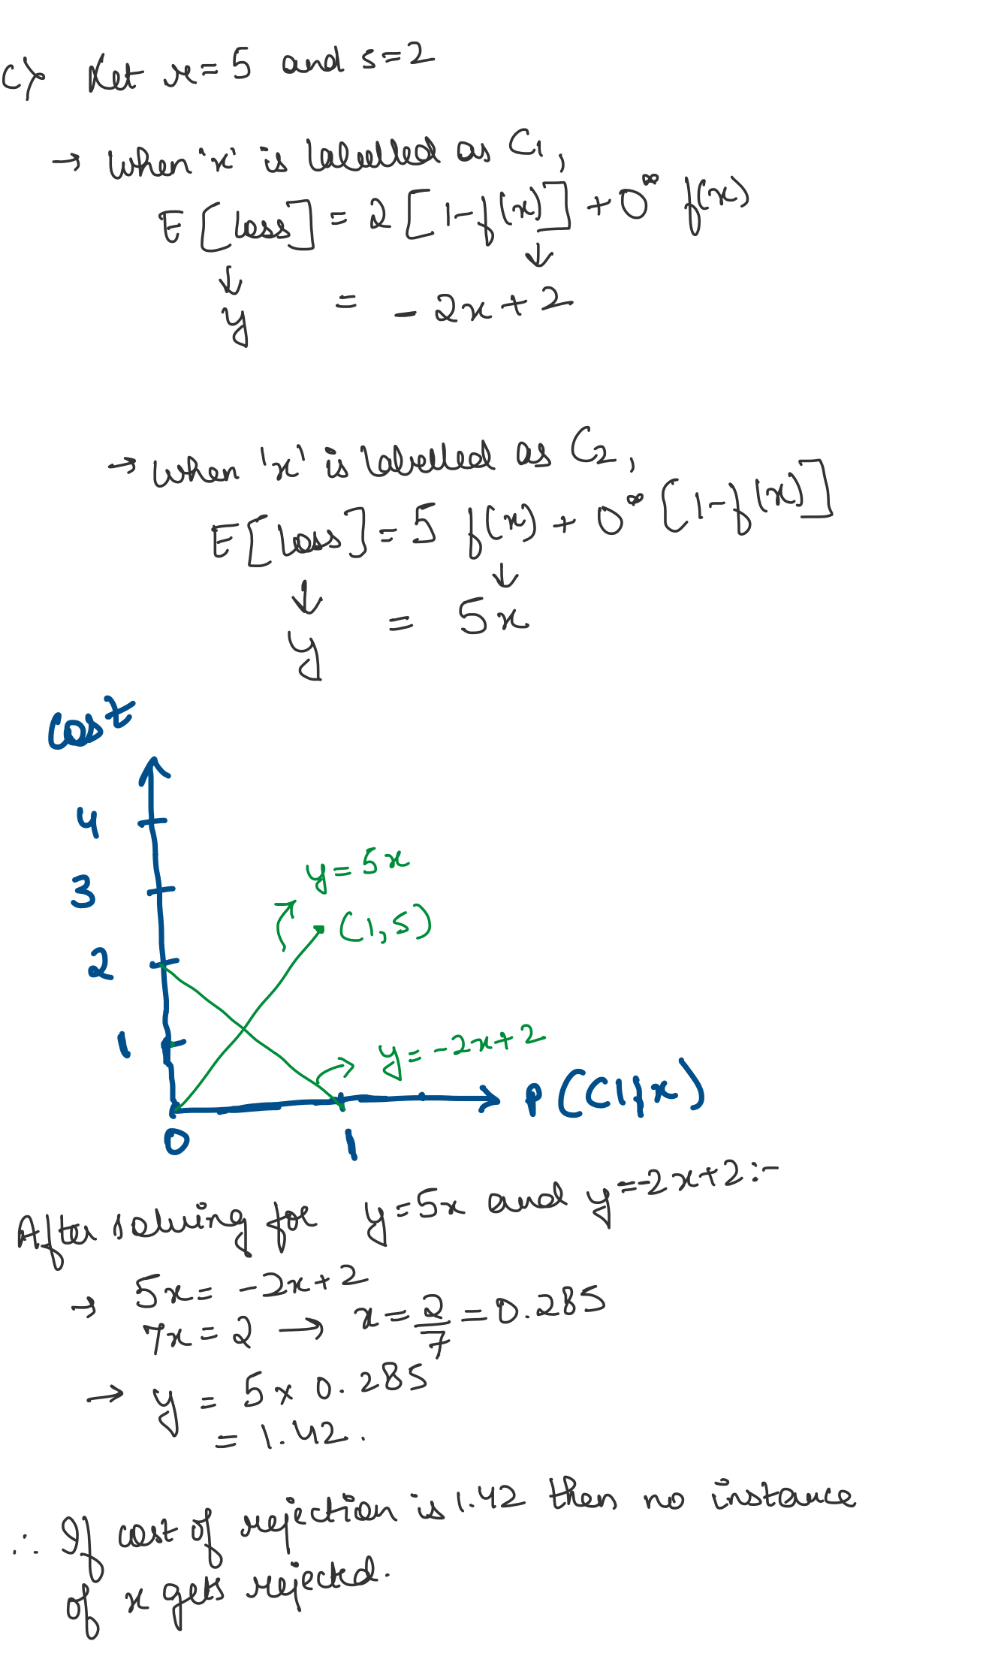


**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

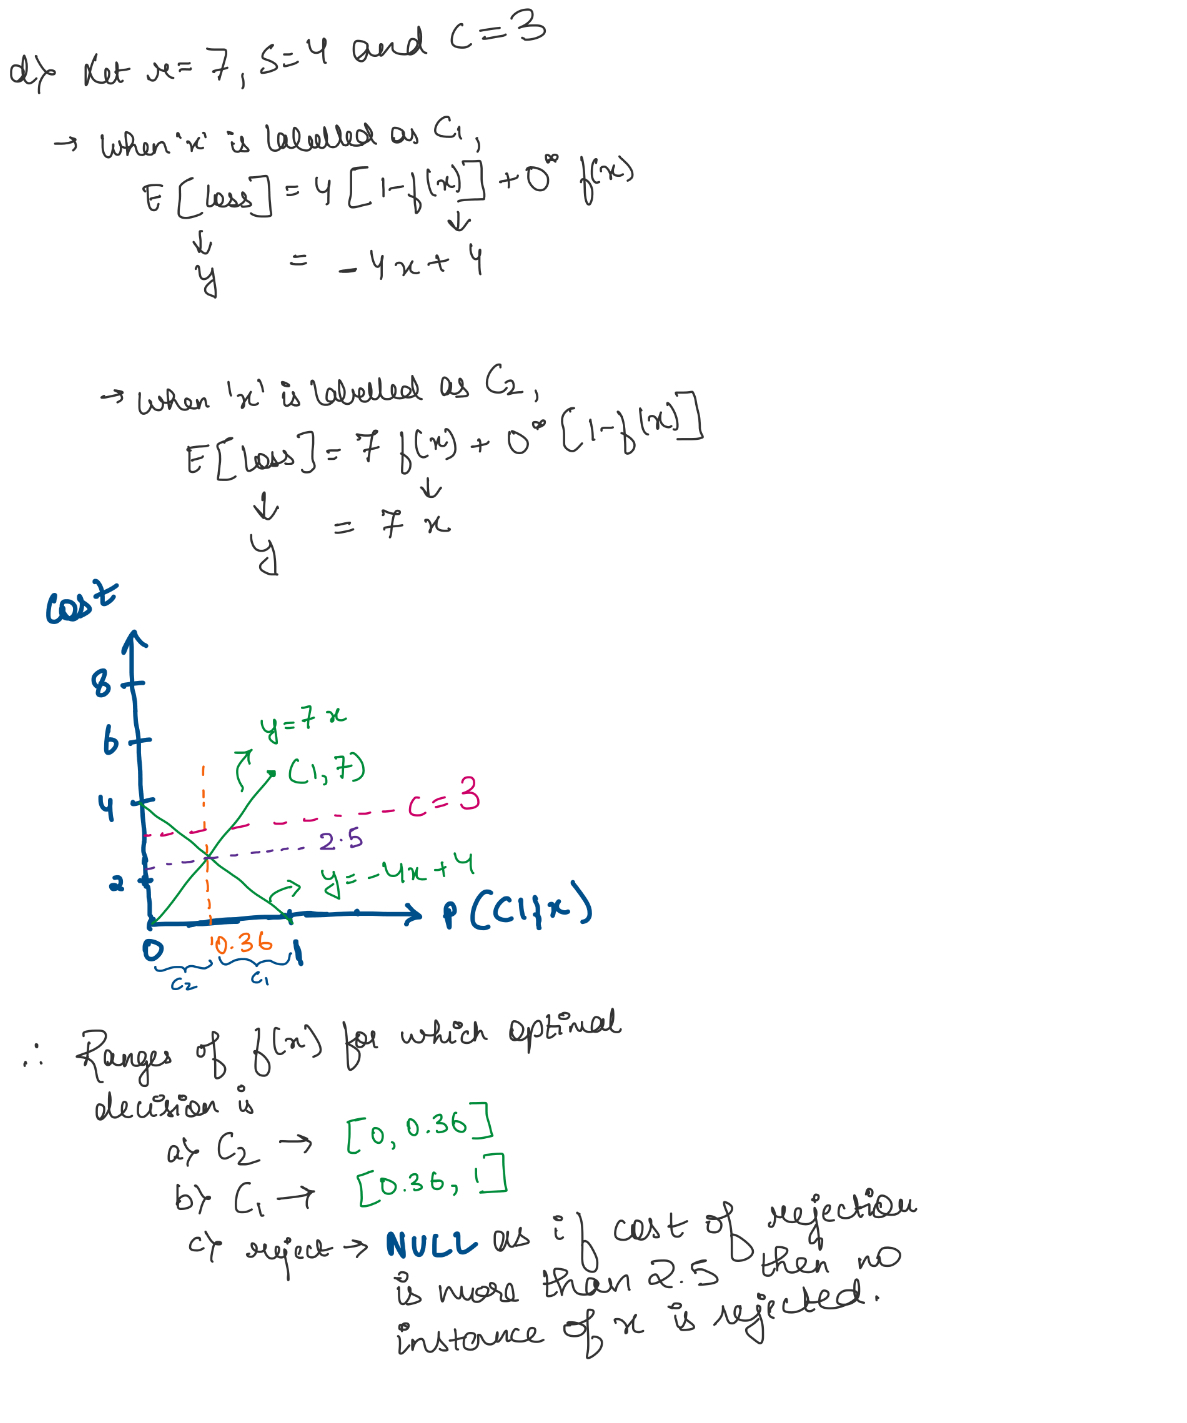

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?


### Answer : The probability will increase by 9%

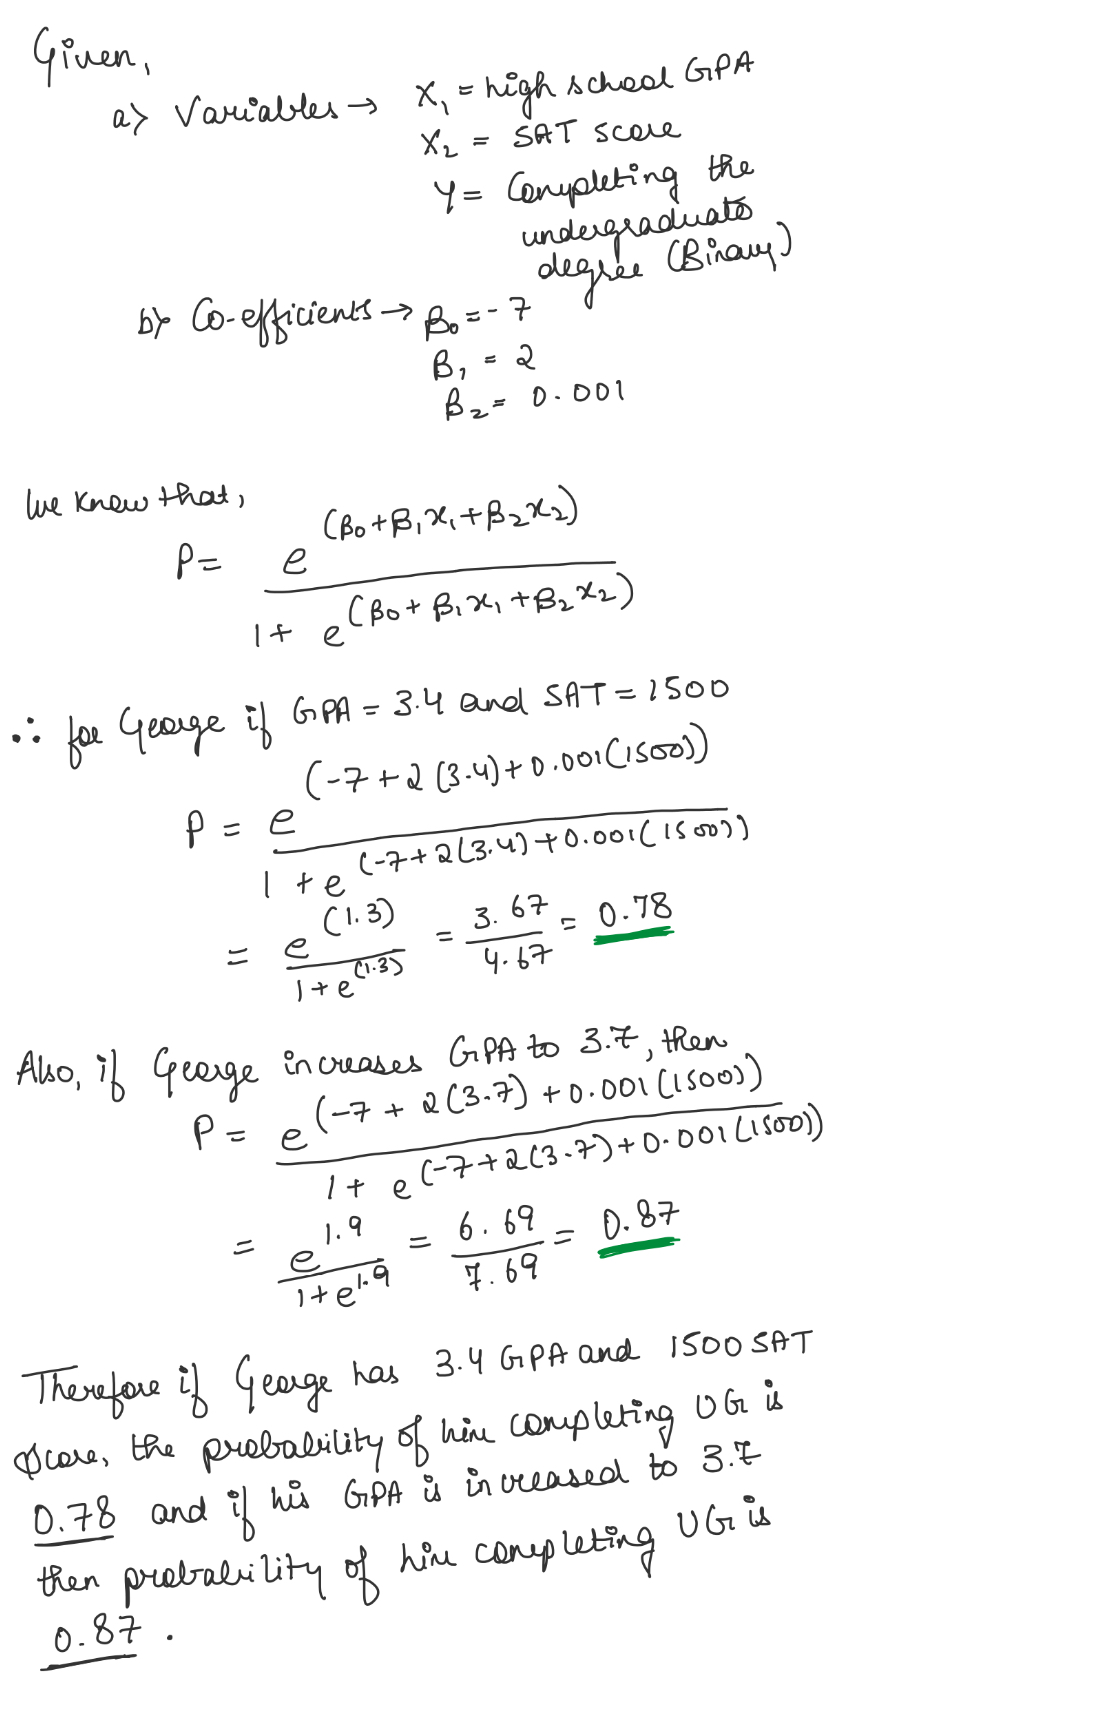


# Question 3 : Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Printing the first five rows
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [5]:
# Replace values with No
df = df.replace(to_replace =['No phone service','No internet service'], value = 'No', regex = True)

In [6]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [7]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

df[yes_no_columns]=df[yes_no_columns].replace(to_replace=['Yes'],value=1,regex=True)
df[yes_no_columns]=df[yes_no_columns].replace(to_replace=['No'],value=0,regex=True)
df['gender']=df['gender'].replace(to_replace=['Female'],value=1,regex=True)
df['gender']=df['gender'].replace(to_replace=['Male'],value=0,regex=True)

In [8]:
df[yes_no_columns] # all 0's and 1's

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,1,1,1,0,1,1,1,1,1,0
7028,1,1,1,1,0,1,1,0,1,1,1,0
7029,1,1,0,0,1,0,0,0,0,0,1,0
7030,1,0,1,1,0,0,0,0,0,0,1,1


(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [9]:
# One hot encoding for categorical columns
# Name your final dataframe df 2
df2=df.copy()
# Your code here
InternetService_dummies = pd.get_dummies(df2['InternetService'],drop_first=True)
df2.drop('InternetService', axis=1, inplace = True) #removing redundant column
df2 = pd.concat([df2, InternetService_dummies], axis=1)

Contract_dummies = pd.get_dummies(df2['Contract'],drop_first=True)
df2.drop('Contract', axis=1, inplace = True) #removing redundant column
df2 = pd.concat([df2, Contract_dummies], axis=1)

PaymentMethod_dummies = pd.get_dummies(df2['PaymentMethod'],drop_first=True)
df2.drop('PaymentMethod', axis=1, inplace = True) #removing redundant column
df2 = pd.concat([df2, PaymentMethod_dummies], axis=1)


In [10]:
df2.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Fiber optic', 'No', 'One year', 'Two year',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [11]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [12]:
df2.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0.000000,0,0,0,1,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0.464789,1,0,1,0,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,2,0,0,0,0,0.014085,1,0,1,1,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,3,0,0,0,0,0.619718,0,0,1,0,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,4,1,0,0,0,0.014085,1,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [13]:
# Train test split
from sklearn.model_selection import train_test_split
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,stratify=y_train, test_size=0.20, random_state= 15) 

In [14]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

Confusion Matrix for Validation set using Decision Tree classifer:
 [[664 162]
 [168 131]]
F1 Score for Validation set using Decision Tree classifer: 0.44256756756756754
Confusion Matrix for Test set using Decision Tree classifer:
 [[846 187]
 [195 179]]
F1 Score for Test set using Decision Tree classifer: 0.4837837837837838


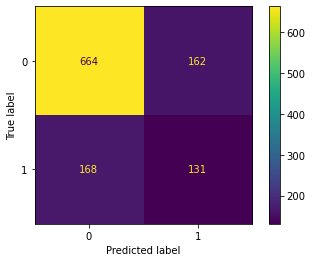

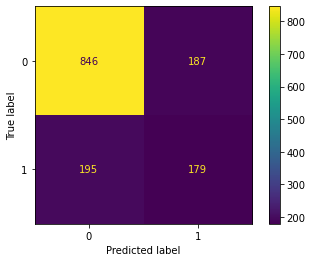

In [15]:
# Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

classifier_dt = tree.DecisionTreeClassifier(random_state=15)
classifier_dt.fit(X_train, y_train)

#using both confusion_matrix and plot_confusion_matrix functions as the latter is deprecated, both give same results though

y_dt_val_pred = classifier_dt.predict(X_val)
cm_dt_val=confusion_matrix(y_val, y_dt_val_pred)
plot_confusion_matrix(classifier_dt,X_val,y_val)
print("Confusion Matrix for Validation set using Decision Tree classifer:\n",cm_dt_val)
print("F1 Score for Validation set using Decision Tree classifer:",f1_score(y_val, y_dt_val_pred))

y_dt_test_pred=classifier_dt.predict(X_test)
cm_dt_test=confusion_matrix(y_test, y_dt_test_pred)
plot_confusion_matrix(classifier_dt,X_test,y_test)
print("Confusion Matrix for Test set using Decision Tree classifer:\n",cm_dt_test)
print("F1 Score for Test set using Decision Tree classifer:",f1_score(y_test, y_dt_test_pred))



Confusion Matrix for Validation set using Logistic Regression classifer:
 [[729  97]
 [141 158]]
F1 Score for Validation set using Logistic Regression classifer: 0.5703971119133573
Confusion Matrix for Test set using Logistic Regression classifer:
 [[932 101]
 [166 208]]
F1 Score for test set using Logistic Regression classifer: 0.6090775988286969


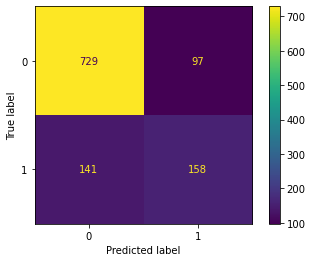

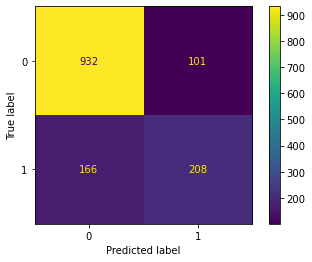

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=15)
classifier_lr.fit(X_train, y_train)

y_lr_val_pred = classifier_lr.predict(X_val)
cm_lr_val=confusion_matrix(y_val, y_lr_val_pred)
plot_confusion_matrix(classifier_lr,X_val,y_val)
print("Confusion Matrix for Validation set using Logistic Regression classifer:\n",cm_lr_val)
print("F1 Score for Validation set using Logistic Regression classifer:",f1_score(y_val, y_lr_val_pred))

y_lr_test_pred=classifier_lr.predict(X_test)
cm_lr_test=confusion_matrix(y_test, y_lr_test_pred)
plot_confusion_matrix(classifier_lr,X_test,y_test)
print("Confusion Matrix for Test set using Logistic Regression classifer:\n",cm_lr_test)
print("F1 Score for test set using Logistic Regression classifer:",f1_score(y_test, y_lr_test_pred))

Confusion Matrix for Validation set using MLP classifer:
 [[677 149]
 [110 189]]
F1 Score for Validation set using MLP classifer: 0.5934065934065933
Confusion Matrix for Test set using MLP classifer:
 [[855 178]
 [126 248]]
F1 Score for test set using MLP classifer: 0.62


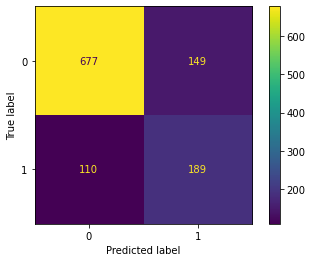

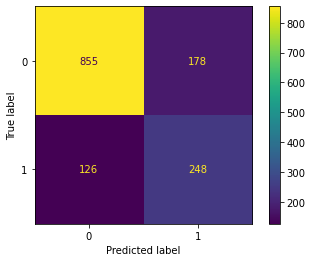

In [17]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

classifier_mlp = MLPClassifier(random_state=15)
classifier_mlp.fit(X_train, y_train)

y_mlp_val_pred = classifier_mlp.predict(X_val)
cm_mlp_val=confusion_matrix(y_val, y_mlp_val_pred)
plot_confusion_matrix(classifier_mlp,X_val,y_val)
print("Confusion Matrix for Validation set using MLP classifer:\n",cm_mlp_val)
print("F1 Score for Validation set using MLP classifer:",f1_score(y_val, y_mlp_val_pred))

y_mlp_test_pred=classifier_mlp.predict(X_test)
cm_mlp_test=confusion_matrix(y_test, y_mlp_test_pred)
plot_confusion_matrix(classifier_mlp,X_test,y_test)
print("Confusion Matrix for Test set using MLP classifer:\n",cm_mlp_test)
print("F1 Score for test set using MLP classifer:",f1_score(y_test, y_mlp_test_pred))


ROC curves for validation set for all three classifiers: 


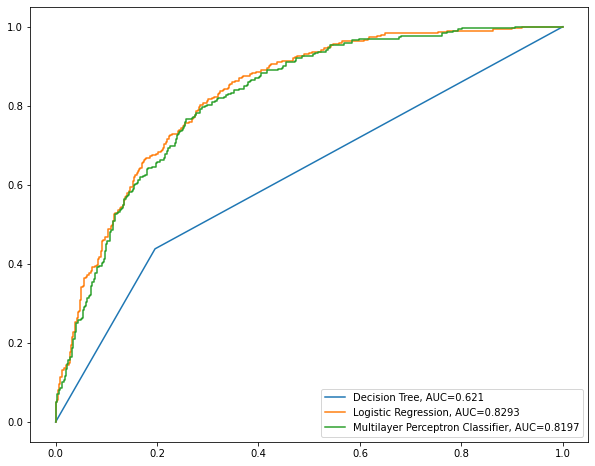

In [18]:
# Plot ROC curves - for validation set
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.figure(figsize = (10,8))
print("ROC curves for validation set for all three classifiers: ")
dt_val_probs = classifier_dt.predict_proba(X_val)
dt_val_probs = dt_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, dt_val_probs)
auc = round(metrics.roc_auc_score(y_val, dt_val_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_val_probs = classifier_lr.predict_proba(X_val)
lr_val_probs = lr_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, lr_val_probs)
auc = round(metrics.roc_auc_score(y_val, lr_val_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_val_probs = classifier_mlp.predict_proba(X_val)
mlp_val_probs = mlp_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, mlp_val_probs)
auc = round(metrics.roc_auc_score(y_val, mlp_val_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

ROC curves for test set for all three classifiers: 


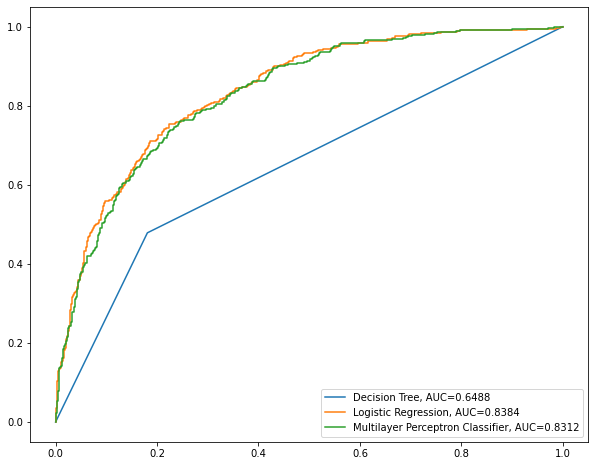

In [19]:
# Plot ROC curves - for test set
plt.figure(figsize = (10,8))
print("ROC curves for test set for all three classifiers: ")
dt_probs = classifier_dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_probs = classifier_mlp.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
auc = round(metrics.roc_auc_score(y_test, mlp_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

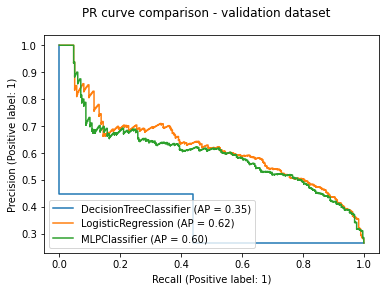

In [20]:
# Plot PR curves -  for validation set
plt.figure(figsize = (10,8))
from sklearn.metrics import precision_recall_curve
plt.figure(figsize = (10,8))
fig = plot_precision_recall_curve(classifier_dt, X_val, y_val)
fig = plot_precision_recall_curve(classifier_lr, X_val, y_val, ax = fig.ax_)
fig = plot_precision_recall_curve(classifier_mlp, X_val, y_val, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - validation dataset")
plt.show()

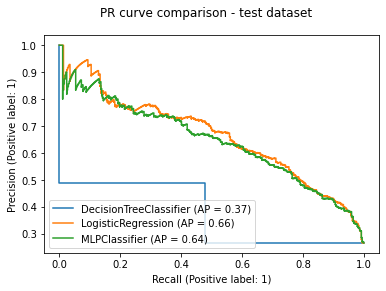

In [21]:
fig = plot_precision_recall_curve(classifier_dt, X_test, y_test)
fig = plot_precision_recall_curve(classifier_lr, X_test, y_test, ax = fig.ax_)
fig = plot_precision_recall_curve(classifier_mlp, X_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - test dataset")
plt.show()


As seen above, the decision tree classifier has a very poor performance compared to Logistic Regression and MLP classifier. Hereon, we will consider results of Logistic and MLP classifier only for comparision with SMOTE.

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores). - Original performance without tuning : AUC=0.829. We need to improve from this value to a higher one.

In [22]:
mlp_gs = MLPClassifier(random_state=15)
parameter_space = {
    'hidden_layer_sizes': [(10,10,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000, 2000, 3000],
    'learning_rate_init':[0.03, 0.003, 0.0003]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=15), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.03, 0.003, 0.0003],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['sgd', 'adam']})

In [23]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.0003, 'max_iter': 1000, 'solver': 'adam'}


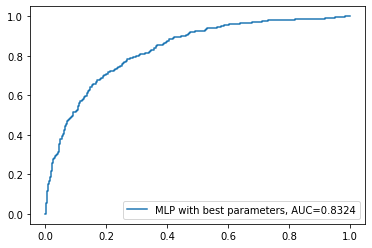

In [24]:
dt_probs = clf.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr,label="MLP with best parameters, AUC="+str(auc))
plt.legend()

As we can see above, increasing the hidden layer size, increasing the max_iter, and activation function being logistic rather than the default values improves the accuracy slightly from 0.8312 to 0.8324. This could possibly be attributes to the bayes error rate being somewhere around 0.835, and hence to improve the classification accuracy, its required to add more features which could help classify the test dataset with a higher accuracy.

## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [25]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)

(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [26]:
# To install imbalanced-learn library use pip install imbalanced-learn command

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)


(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [27]:
# Answer here
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res,stratify=y_res, test_size=0.20, random_state= 15) 

In [28]:
# Number of classes in training Data
y_train.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [29]:
# Number of classes in validation Data
y_val.value_counts()

1    826
0    826
Name: Churn, dtype: int64

In [30]:
y_test.value_counts() #still imbalanced, a better representation of actual problem

0    1033
1     374
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

Confusion Matrix for Validation set using Logistic Regression classifer:
 [[651 175]
 [106 720]]
F1 Score for Validation set using Logistic Regression classifer: 0.8367228355607206
Confusion Matrix for Test set using Logistic Regression classifer:
 [[819 214]
 [126 248]]
F1 Score for Test set using Logistic Regression classifer: 0.5933014354066986


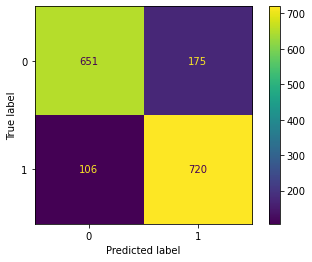

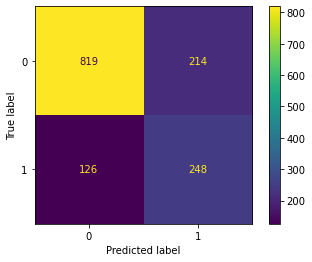

In [31]:
# Logistic Regression
classifier_lr = LogisticRegression(random_state=15)
classifier_lr.fit(X_train, y_train)

y_lr_val_pred = classifier_lr.predict(X_val)
cm_lr_val=confusion_matrix(y_val, y_lr_val_pred)
plot_confusion_matrix(classifier_lr,X_val,y_val)
print("Confusion Matrix for Validation set using Logistic Regression classifer:\n",cm_lr_val)
print("F1 Score for Validation set using Logistic Regression classifer:",f1_score(y_val, y_lr_val_pred))

y_lr_test_pred=classifier_lr.predict(X_test)
cm_lr_test=confusion_matrix(y_test, y_lr_test_pred)
plot_confusion_matrix(classifier_lr,X_test,y_test)
print("Confusion Matrix for Test set using Logistic Regression classifer:\n",cm_lr_test)
print("F1 Score for Test set using Logistic Regression classifer:",f1_score(y_test, y_lr_test_pred))


Confusion Matrix for Validation set using MLP classifer:
 [[527 299]
 [ 69 757]]
F1 Score for Validation set using MLP classifer: 0.8044633368756643
Confusion Matrix for Test set using MLP classifer:
 [[687 346]
 [ 76 298]]
F1 Score for Test set using MLP classifer: 0.5854616895874263


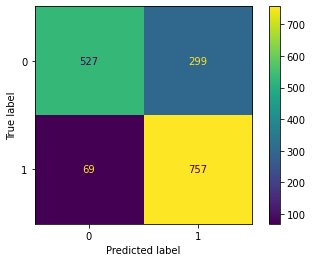

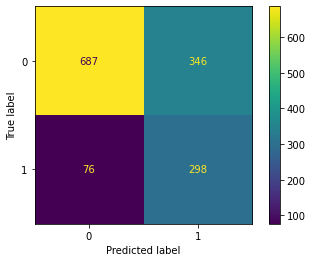

In [32]:
# MLP
classifier_mlp = MLPClassifier(random_state=15)
classifier_mlp.fit(X_train, y_train)

y_mlp_val_pred = classifier_mlp.predict(X_val)
cm_mlp_val=confusion_matrix(y_val, y_mlp_val_pred)
plot_confusion_matrix(classifier_mlp,X_val,y_val)
print("Confusion Matrix for Validation set using MLP classifer:\n",cm_mlp_val)
print("F1 Score for Validation set using MLP classifer:",f1_score(y_val, y_mlp_val_pred))

y_mlp_test_pred=classifier_mlp.predict(X_test)
cm_mlp_test=confusion_matrix(y_test, y_mlp_test_pred)
plot_confusion_matrix(classifier_mlp,X_test,y_test)
print("Confusion Matrix for Test set using MLP classifer:\n",cm_mlp_test)
print("F1 Score for Test set using MLP classifer:",f1_score(y_test, y_mlp_test_pred))


## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

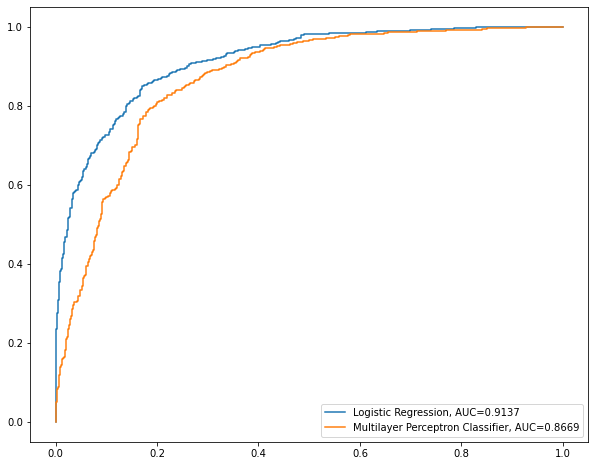

In [33]:
# Plot ROC curves - for validation data
plt.figure(figsize = (10,8))
lr_val_probs = classifier_lr.predict_proba(X_val)
lr_val_probs = lr_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, lr_val_probs)
auc = round(metrics.roc_auc_score(y_val, lr_val_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_val_probs = classifier_mlp.predict_proba(X_val)
mlp_val_probs = mlp_val_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, mlp_val_probs)
auc = round(metrics.roc_auc_score(y_val, mlp_val_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))

plt.legend()

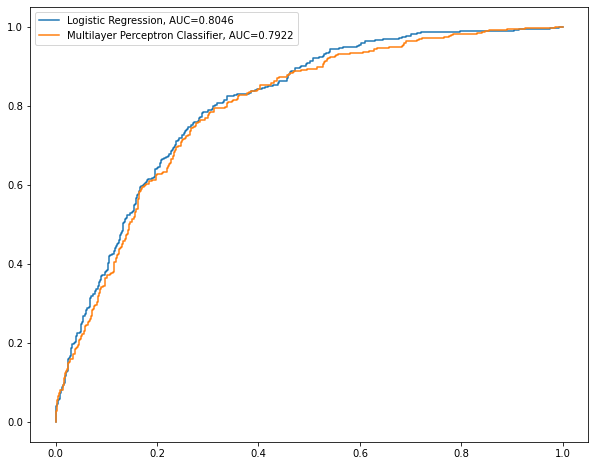

In [34]:
#plot ROC curve - for test data
plt.figure(figsize = (10,8))
lr_probs = classifier_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
auc = round(metrics.roc_auc_score(y_test, lr_probs), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

mlp_probs = classifier_mlp.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, mlp_probs)
auc = round(metrics.roc_auc_score(y_test, mlp_probs), 4)
plt.plot(fpr,tpr,label="Multilayer Perceptron Classifier, AUC="+str(auc))


plt.legend()

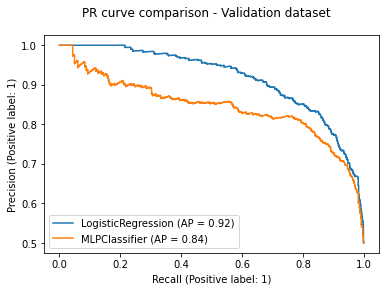

In [35]:
fig.figsize = (10,8)
fig = plot_precision_recall_curve(classifier_lr, X_val, y_val)
fig = plot_precision_recall_curve(classifier_mlp, X_val, y_val, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - Validation dataset")
plt.show()


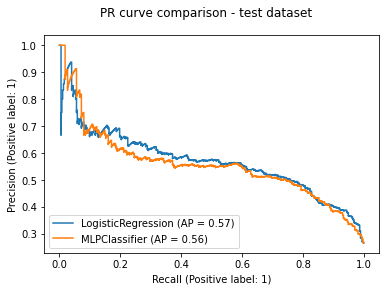

<Figure size 720x576 with 0 Axes>

In [36]:
# Plot PR curves for test dataset
fig.figsize = (10,8)
fig = plot_precision_recall_curve(classifier_lr, X_test, y_test)
fig = plot_precision_recall_curve(classifier_mlp, X_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("PR curve comparison - test dataset")
plt.figure(figsize = (10,8))
plt.show()


Summarizing all the above scores and values as below:

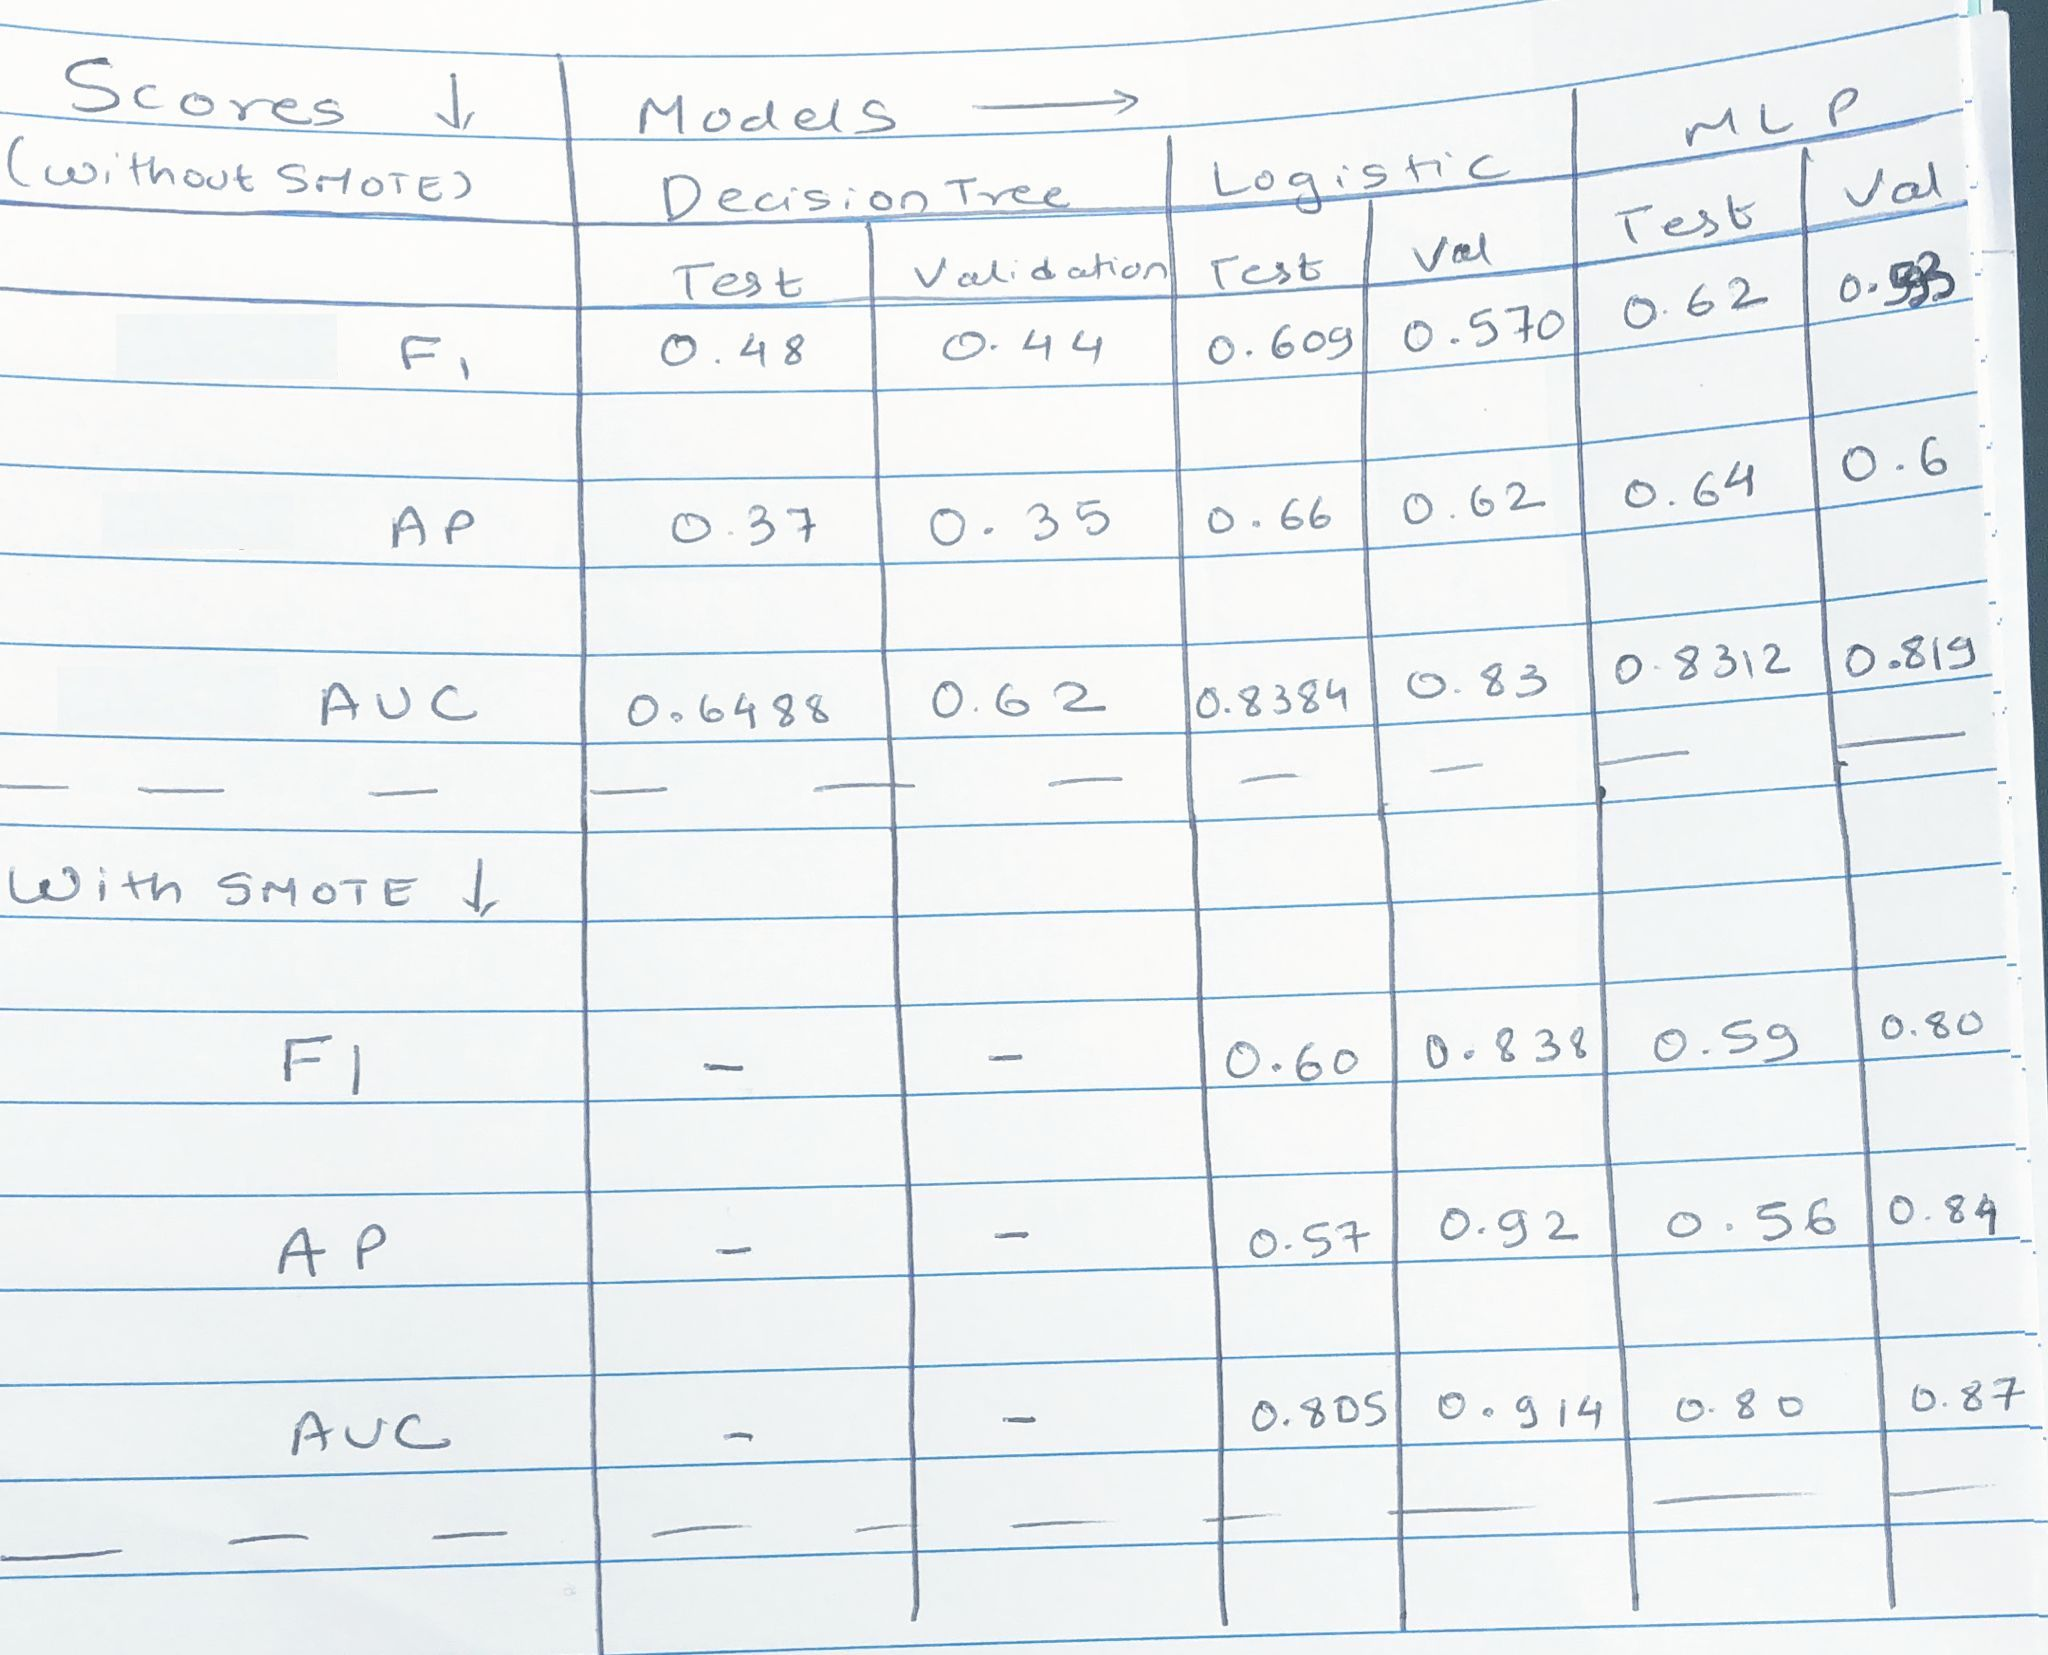

In [37]:
from IPython.display import Image
Image("Summary.jpeg", width=1000, height=800)

 c)
### *Comparing the Validation dataset results with class imbalanced data and without imbalanced data:*
The ROC curve results show an improvement from 0.83 AUC to 0.91 AUC for logistic regression and from 0.83 AUC to 0.87 AUC for MLP classifier.
Also, upon comparing the PR curves for both cases, i.e. with and without imbalanced data for validation dataset, we can see an improvement in average precision for Logistic regression and MLP classifier from 0.62 to 0.92 for logistic and 0.60 to 0.83 for MLP. This was expected because the positive and negative values in the validation set have the same proportion as the proportion of positive to negative class in the training data set. And hence, we see an overall improvement in the accuracy and precision.

### *Comparing the test dataset results with class imbalanced data and without imbalanced data:*
The ROC curve do not show an improvement as the AUC drops slightly from 0.8384 to 0.805 for Logistic regression and drops from 0.8312 to 0.80 for the MLP classifier.
Similar is the case with the precision recall curves or average precision values. Upsampling the data has slightly reduced the average precision values for the test dataset. For the test set we can see a slight dip in average precision for Logistic regression and MLP classifier from 0.66 to 0.57 for logistic and 0.64 to 0.56 for MLP.

### *Comparing the F1 scores for both models with and without SMOTE*
F1 score, being a geometric mean of precision and recall, gives us a better measure of the performance of classification models. 
As seen above, for the models run on data without SMOTE, Logistic regression has an F1 score of 0.57 on validation and 0.60 on the test dataset. Similarly, for MLP model, the F1 score is 0.593 and 0.62 on validation and test respectively.
After applying SMOTE, the F1 score of Logistic regression for the validation set increases to 0.838 and for MLP on validation increases to 0.80. But on the test set, F1 score approximately stays the same for logistic regression at 0.6 but degrades a bit in case of MLP from 0.62 to 0.58. This could be attributed to the case of MLP overfitting the training data with SMOTE, resulting in more misclassifications on the test dataset where there are not equal number of positive and negative classes.

##### The test dataset is a better representative of the actual/original problem.

Therefore, overall we can see that the upsampling has helped improve performance on the validation dataset but, not on the test dataset, which is an actual representation of the original/actual problem. This could be attributed to the larger set size of test data compared to the validation and also test data being unseen /from the future, it is expected to have a lower precision because it still has imbalance of data with respect to the output variable class. Ultimately, the decision of classification should be based on the class of interest, and if its a highly imbalanced, we should adjust the threshold accordingly to have appropriate sensitivity and also consider the cost matrix which will give us a metric to quantify misclassification costs in order to obtain an optimized overall output.

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) [4 pts]** Find the probability that  Umbrella = 0 


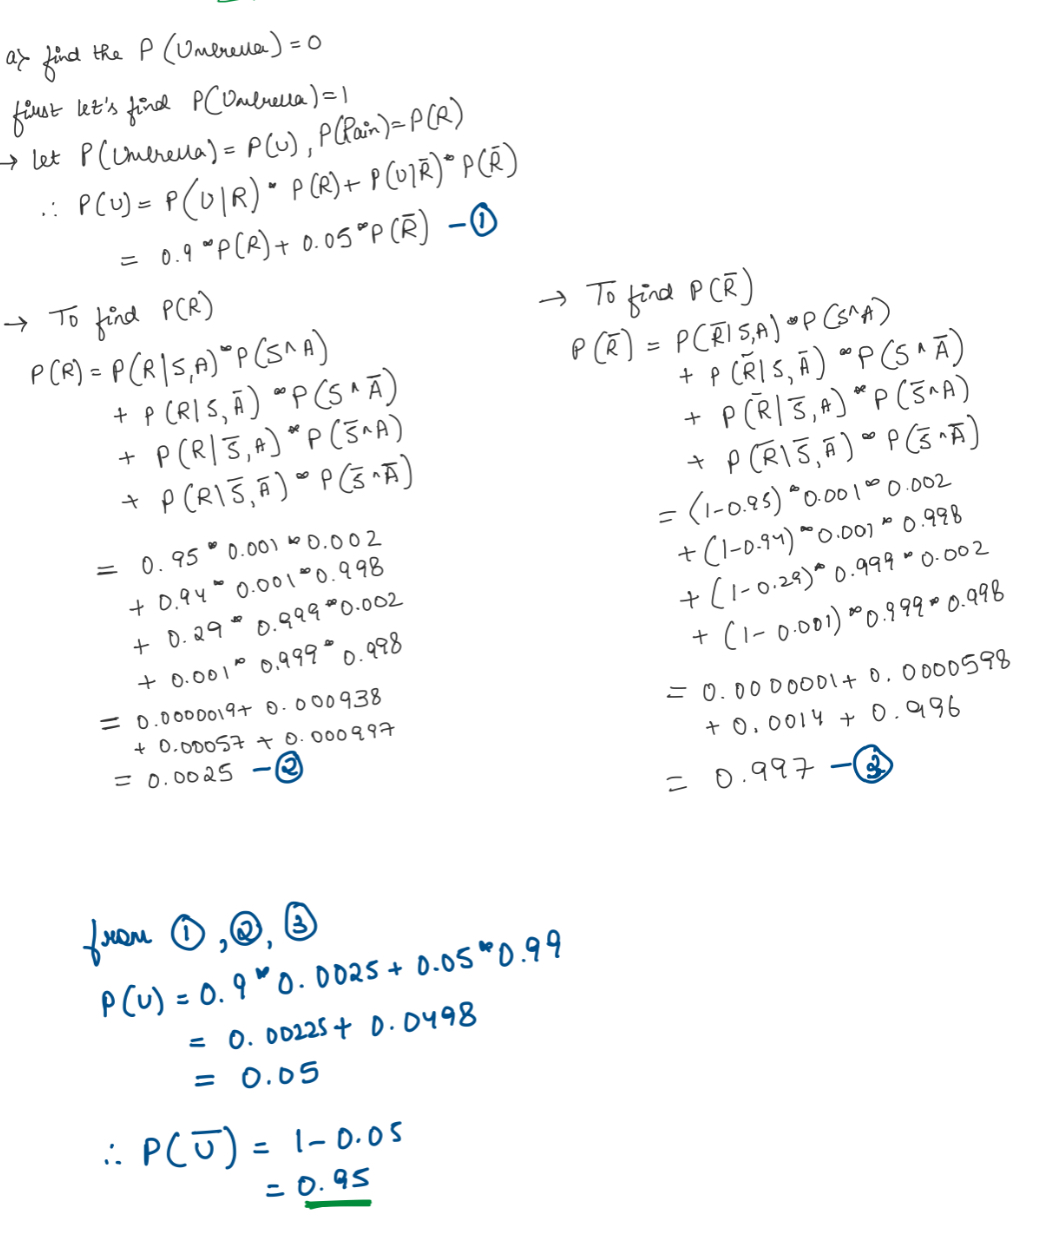


**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1


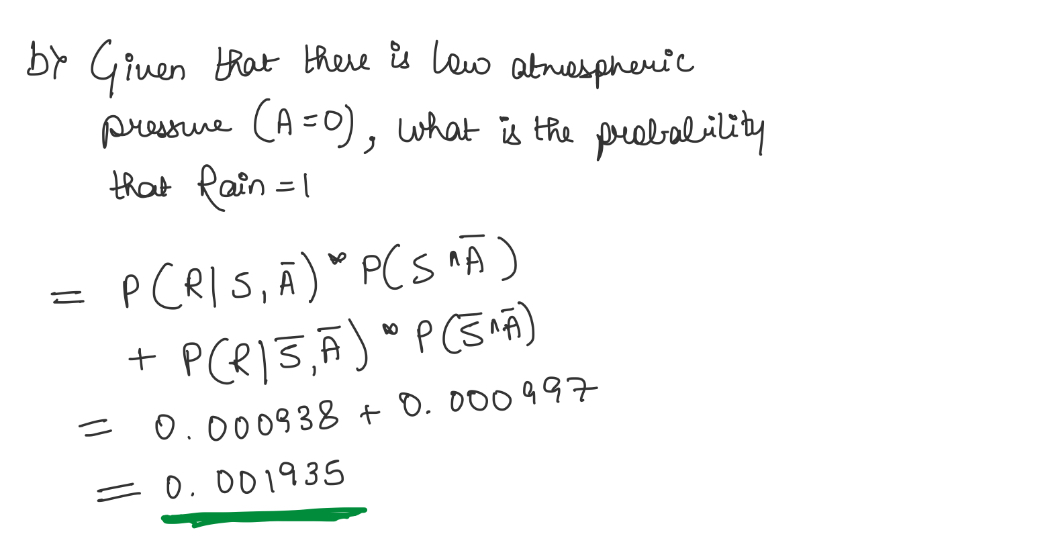


**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)

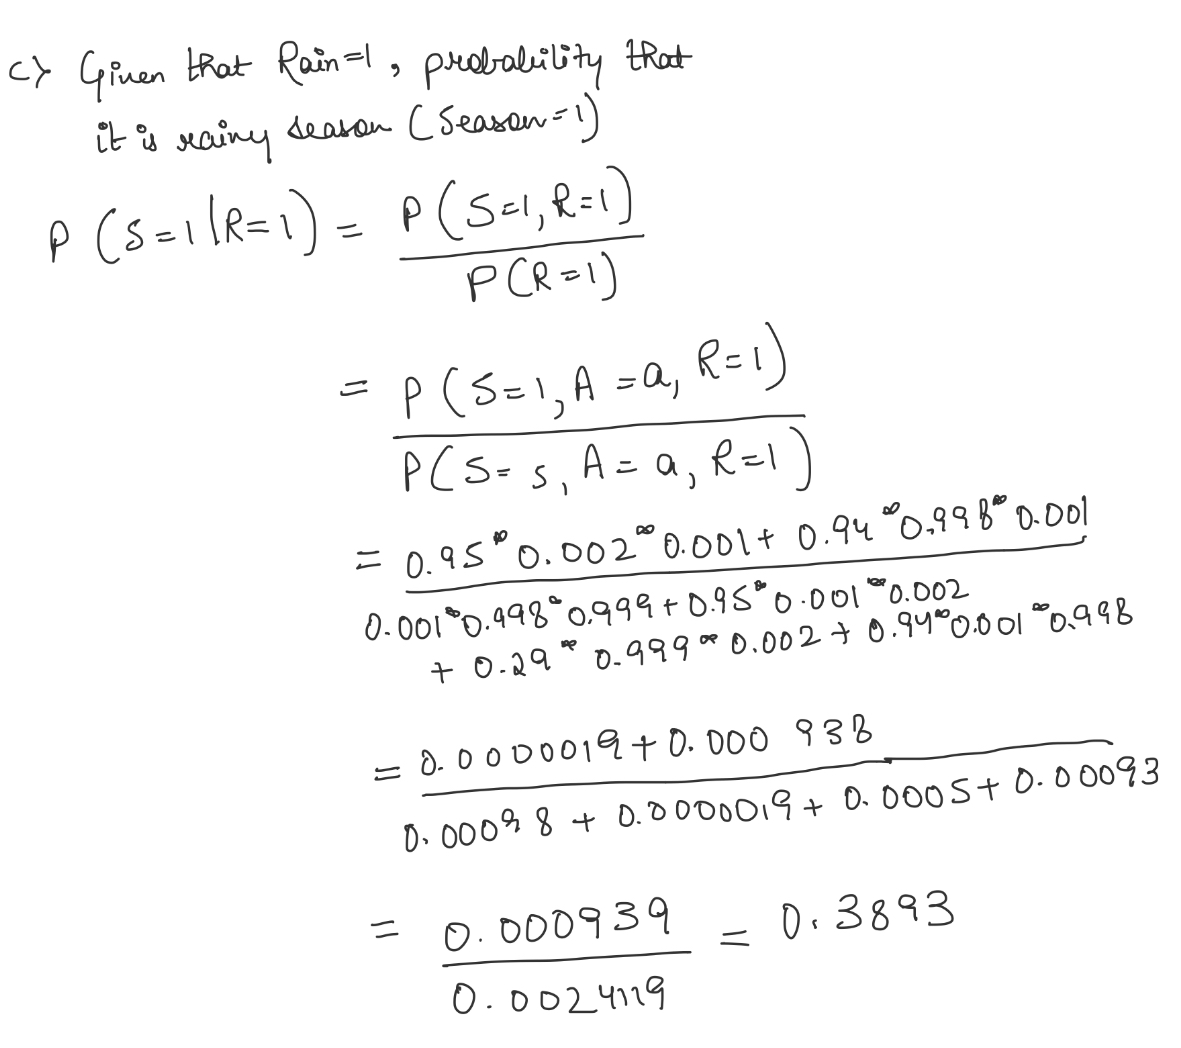

# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.

#### 1
### Support vector machines (SVM) 
Support vector machines (SVM) seeks an optimal answer in the space of linear classifiers, meaning that SVM will find the optimal decision boundary among the linear classifers trained on a particular dataset.
To explain this with an example, consider the below data containing labelled data of two classes, Red and Green.(Figure 1)
Visually, its evident that the decision boundary can lie anywhere between the two classes, but to explain the advantage of SVM among linear classifiers, consider it to be at position A. Now, If a random test point 'x' is to be classified, based on the decision boundary, we would classify it as Red, even though it is closer to a majority of Green points. Using a SVM classifier would overcome this situation by use of Support vectors for deciding the decision boundary.
It would look at the closest points to the decision boundary and move the decision boundary to be between these extreme points belonging to their respective classes such that it maximises the margin on both sides. This would mean that in the case considered above, the test point will be classified correctly as a green point as the decision boundary lies exactly at the midpoint of the extreme values belonging to each class(support vectors)(Figure 2). This particular case is widely known as hard margin SVM.

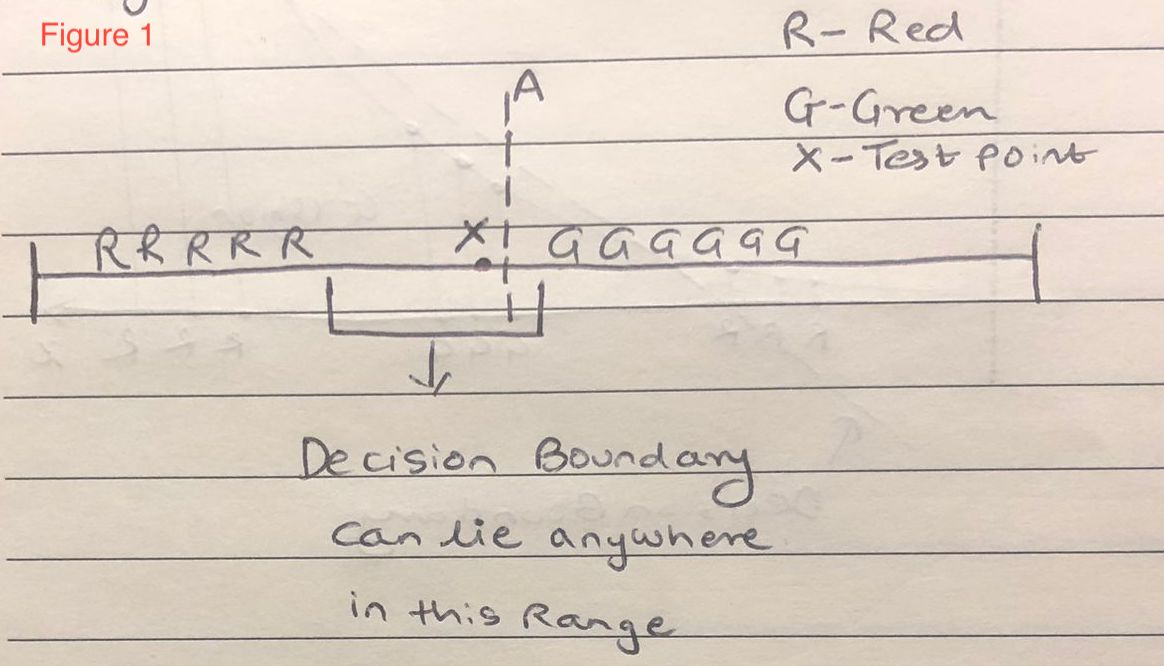

In [38]:
from IPython.display import Image
Image("Figure 1.jpeg", width=1000, height=800)


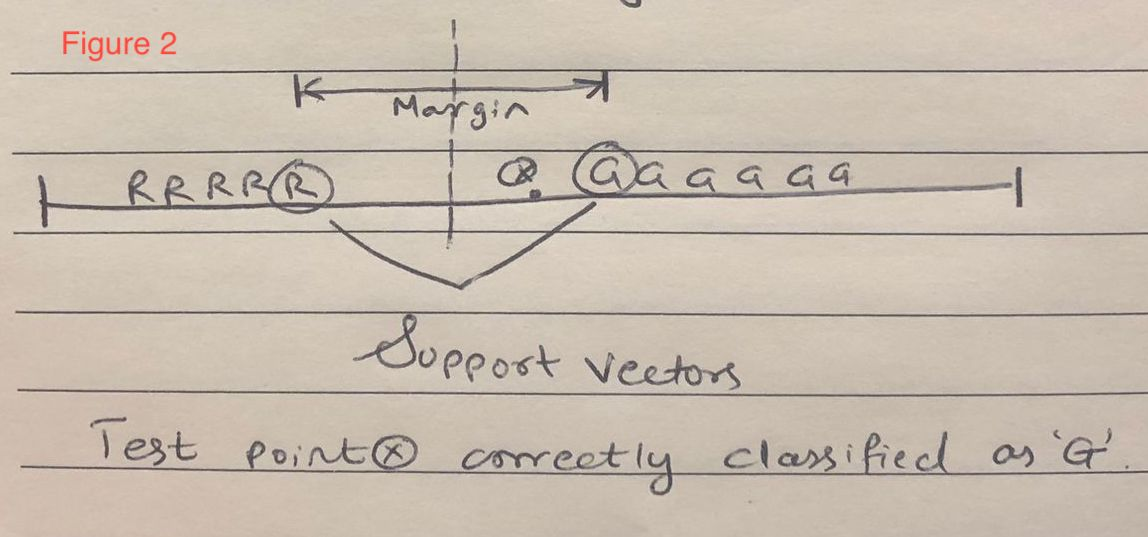

In [39]:
Image("Figure2.png", width=1000, height=800)

#### 2.
However, given the above explaination, there could be cases where there is/are misclassified data point(s) in the training dataset which would set the decision boundary to have a bias as well. To overcome this, we allow a certain degree of misclassification in order to make our classifier model robust to outliers/misclassifications, and this degree of misclassification is measured by a slack variable. The slack variable is defined for each data point and is greater than 1 for misclassifications and lies between 0 and 1 for points closer to the decision boundary. Our aim is to minimize the values of slack penalty to get the optimal classifer and the decision boundary using support vectors and this particular model widely known as soft margin SVM, as it allows some violations to have a better linear classifier. Intuitively, the soft margin SVM reduces the model bias of a Hard margin SVM, and thus, aiming to attain a low bias(ideally expected) model.


To summarize the allowed two misclassifications in Soft margin SVMs, it can be stated as:


    1. The point is on the wrong side of the decision boundary but on the correct side/on the margin
    2. The point is on the wrong side of the decision boundary and on the wrong side of the margin 

#### 3.
In some cases, linear classifying decision boundary is not possible for a given dataset even when the data appears to be visually separate across classes. In this case, the SVM framework can be extended in order to provide a non linear decision boundary by transforming the original dimension to a higher dimensional space and then finding an optimal decision boundary(hyperplane) to separate the classes.
For eg, in the below figure(Figure 3), a linear boundary is not possible to separate the red points from the green points only in the 'X' feature space. In this case, the SVM framework can be extended to a higher dimensional feature space by transforming the original feature space. For example, if we calculate x^2, we get the following points shown in fig 3 on the x axis and then these can be separated using a 2D hyperplane, using the above discussed SVM model.
There are multiple transformation kernels such as polynomial kernel, sigmoid kernel, gaussian, RBF kernels, etc. which can be used to transform data in order to obtain the optimal non linear decision boundary using SVM in a higher dimensional space via transformations.

Hence to summarize, the soft margin (tolerance of misclassifications) extension to SVM lowers the model bias by introducting slack penalty and kernel tricks transform data to higher dimension such that Support Vector Machine is able to structure the decision boundary for linear non-separable cases.

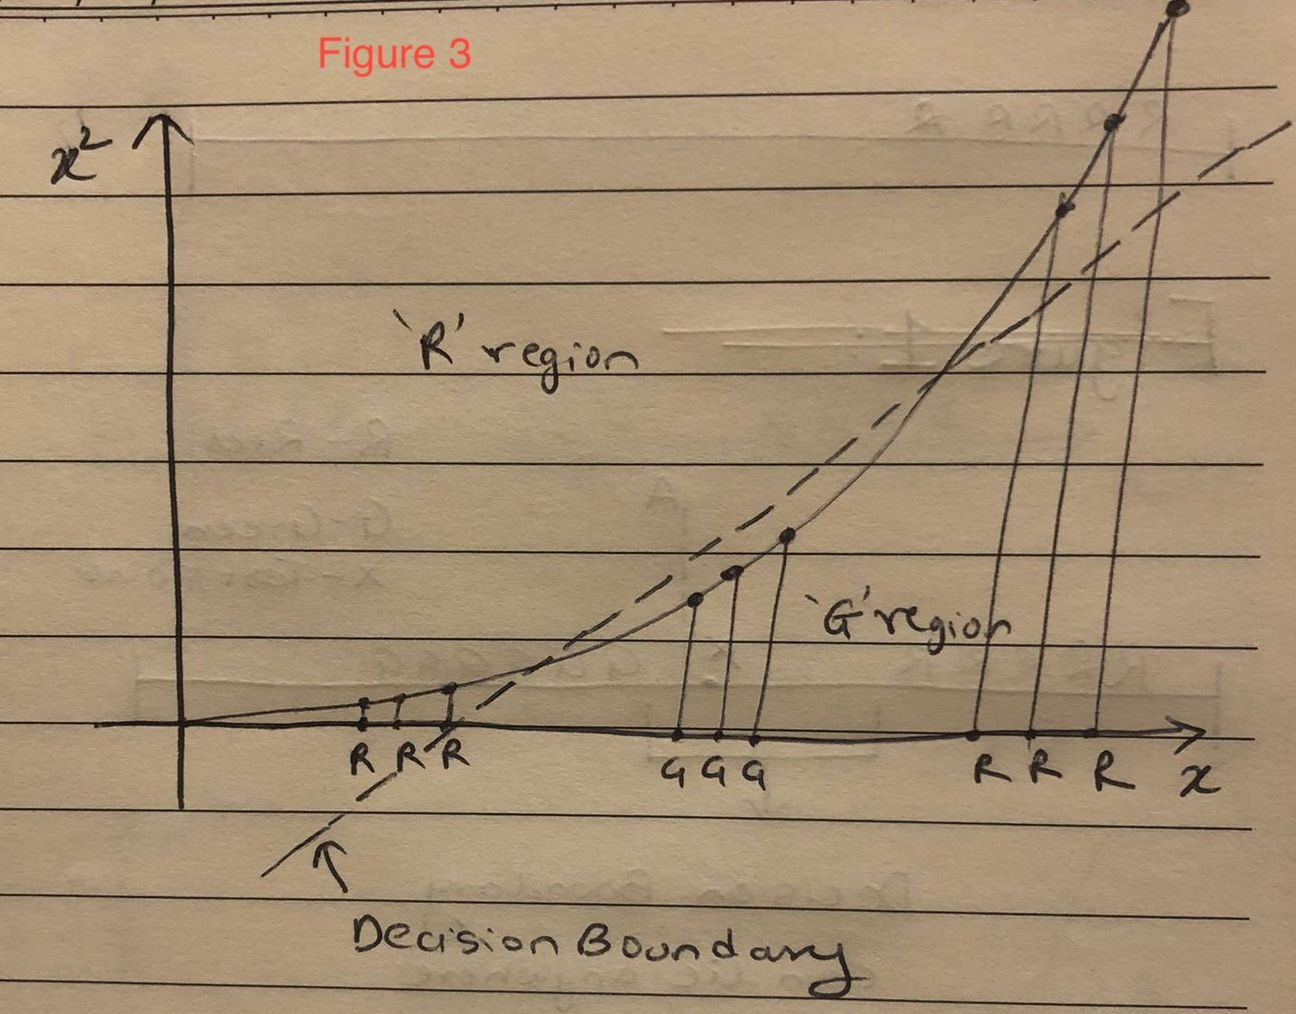

In [40]:
Image("Figure 3.jpeg", width=1000, height=800)